<a href="https://colab.research.google.com/github/deddyandri/Excel-projects/blob/main/Stocks_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement and Project Overview

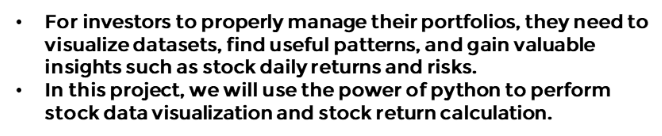

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [3]:
# Read the stock data csv file
# use Pandas to read the file
stock_df = pd.read_csv('/content/drive/MyDrive/PYTHON SEMUA/MASTER PYTHON for FINANCE (udemy 2 dec 2024)/Colab Notebooks/UDEMY Python for Financial analysis/stock.csv')

In [4]:
# AAPL = Apple
# BA = Boeing
# T = AT&T
# MGM = MGM Resort International (Hotel Industry)
# IBM = IBM
# TSLA = Tesla Motors
# GOOG = Google
# sp500 = US Stock Market

In [5]:
stock_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [6]:
# Sort the stock data by date
stock_df = stock_df.sort_values('Date')
stock_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [7]:
stock_df.columns[1:]

Index(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500'], dtype='object')

In [8]:
# Print out the number of stocks
print('Total Number of stocks :{}'.format(len(stock_df.columns[1:])))

Total Number of stocks :9


In [9]:
# Average return of stock
stock_df[stock_df.columns[1:]].mean()

,0
AAPL,140.819823
BA,189.942700
T,35.162899
MGM,23.105743
AMZN,915.665665
IBM,161.853001
TSLA,259.600815
GOOG,783.712512
sp500,2218.749554


In [10]:
# standard deviation
stock_df[stock_df.columns[1:]].std()

,0
AAPL,70.827601
BA,103.678586
T,3.207490
MGM,6.963847
AMZN,697.838905
IBM,25.561938
TSLA,210.988003
GOOG,334.448057
sp500,537.321727


In [11]:
# All stocks description
stock_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


### Exploratory Data Analysis

In [12]:
# Check if data contains any null values
stock_df.isnull().sum()

,0
Date,0
AAPL,0
BA,0
T,0
MGM,0
AMZN,0
IBM,0
TSLA,0
GOOG,0
sp500,0


In [13]:
# Getting dataframe info & memory uses
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


In [14]:
# Plot stocks data
# Define a function to plot the entire dataframe

def show_plot(df,fig_title):
  df.plot(x= 'Date', figsize=(15,7), linewidth = 3, title=fig_title)
  plt.grid()
  plt.show()

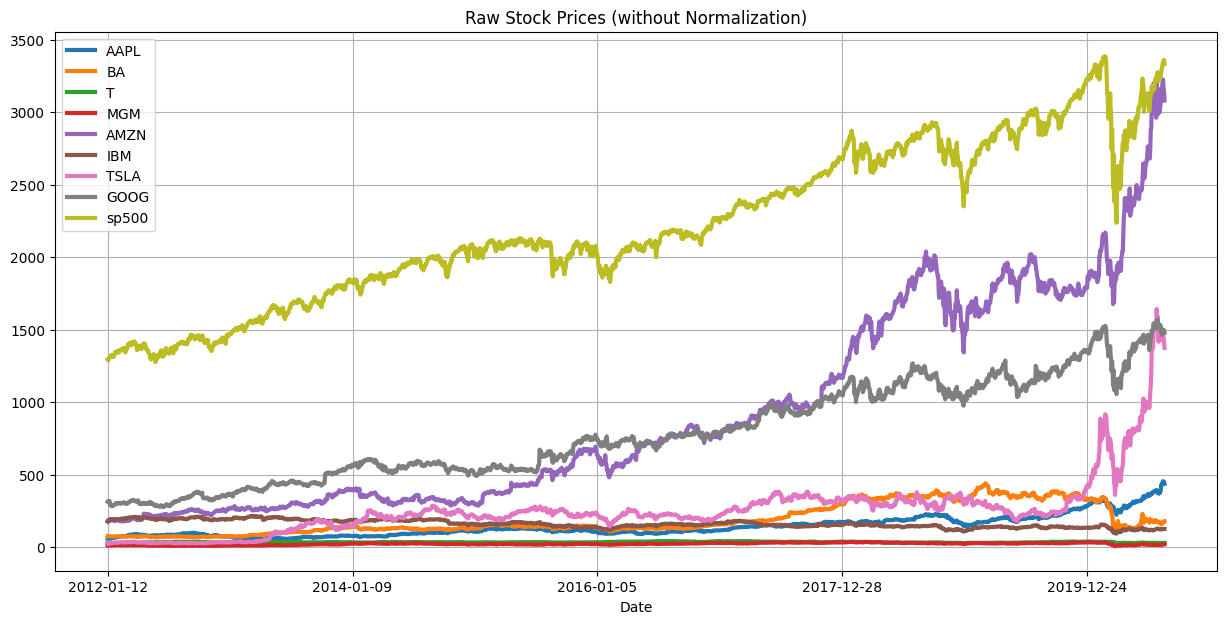

In [15]:
# Plot the data
show_plot(stock_df, 'Raw Stock Prices (without Normalization)')

In [16]:
# Print out normalized (scaled) stock prices
# all stock price will be divided by price form index 0 to get all the price on chart start from 1

def normalize(df) :
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x


In [17]:
normalize(stock_df)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,7.313297,2.308039,0.991036,1.378401,18.217644,0.694821,52.567080,4.698347,2.568715
2155,2020-08-06,7.568452,2.280493,0.990704,1.521847,18.331155,0.698532,52.728494,4.782805,2.585226
2156,2020-08-07,7.383066,2.251622,0.996680,1.568838,18.004093,0.692107,51.423361,4.764919,2.586862
2157,2020-08-10,7.490377,2.375977,1.002656,1.784831,17.894390,0.704016,50.214865,4.770052,2.593956


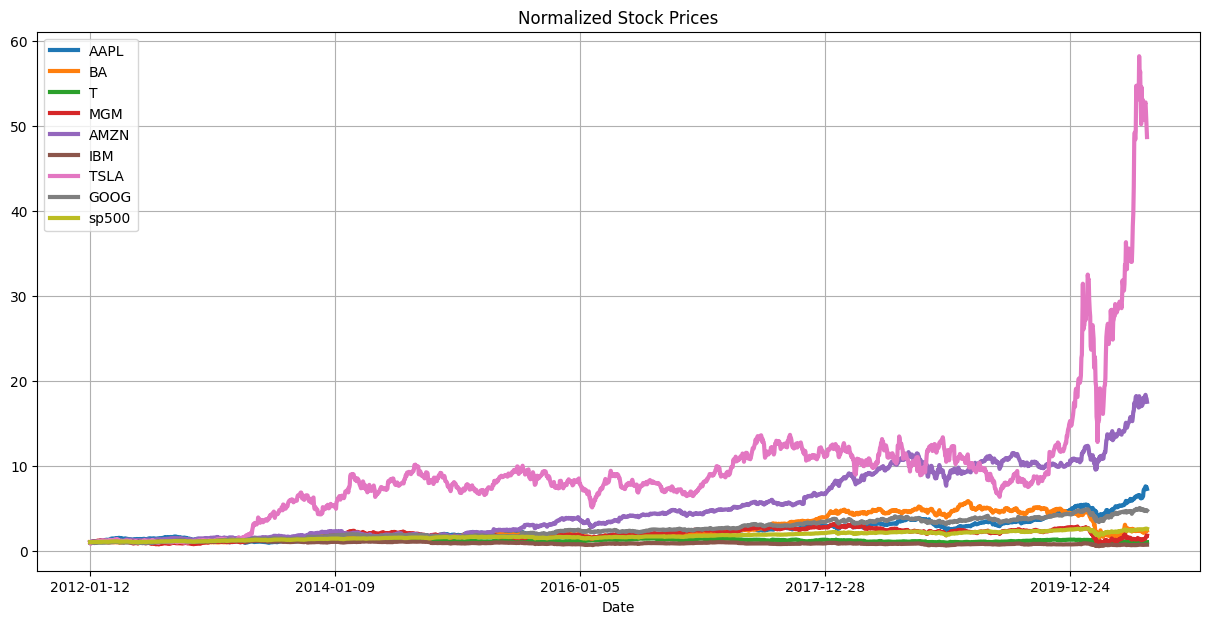

In [18]:
show_plot(normalize(stock_df), 'Normalized Stock Prices')

In [19]:
# Tesla and amazone showed gains of 48 % and 17 % respectively
# we can check it by calculate between first price with last price
# for Tesla, (1374.39-28.25)/28.25 x 100% = 48%
# for amazone, (3080.66-175.92)/175.92 x 100% = 17%

### Performe Interactive Data Visualization

In [20]:
# use interactive data plotting using plotly.express
# note : at the beginning, i have already import library
# import plotly.express as px
# import plotly.figure_factory as ff
# import plotly.graph_objects as go

for more tutorial about plotly, here is a link we can follow
[plotly time-series chart](https://plotly.com/python/time-series/)

In [21]:
def interactive_plot(df,title) :
  fig = px.line(title=title)

  for i in df.columns[1:] :
    fig.add_scatter(x=df['Date'], y=df[i], name=i)
  fig.show()

In [22]:
interactive_plot(stock_df, 'Interactive Stock Prices')

In [23]:
# Why is it said to be interactive, because when we browse the chart,
# when we place the cursor on the chart, the date will appear.
# Then we can zoom to see more details of the chart.

In [24]:
# lets assume we bouht 100 share of S&P500 on 19th feb 2020, how much did we lose by march 23rd, 2020 ?

interactive_plot(normalize(stock_df),'Normalized Prices')

In [25]:

# Assuming 'stock_df' DataFrame is already loaded as in your provided code.

# Convert 'Date' column to datetime objects
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

# Filter data for the specified date range
start_date = '2020-02-19'
end_date = '2020-03-23'
filtered_df = stock_df[(stock_df['Date'] >= start_date) & (stock_df['Date'] <= end_date)]

2037    3386.149902
2038    3373.229980
2039    3337.750000
2040    3225.889893
2041    3128.209961
2042    3116.389893
2043    2978.760010
2044    2954.219971
2045    3090.229980
2046    3003.370117
2047    3130.120117
2048    3023.939941
2049    2972.370117
2050    2746.560059
2051    2882.229980
2052    2741.379883
2053    2480.639893
2054    2711.020020
2055    2386.129883
2056    2529.189941
2057    2398.100098
2058    2409.389893
2059    2304.919922
2060    2237.399902
Name: sp500, dtype: float64


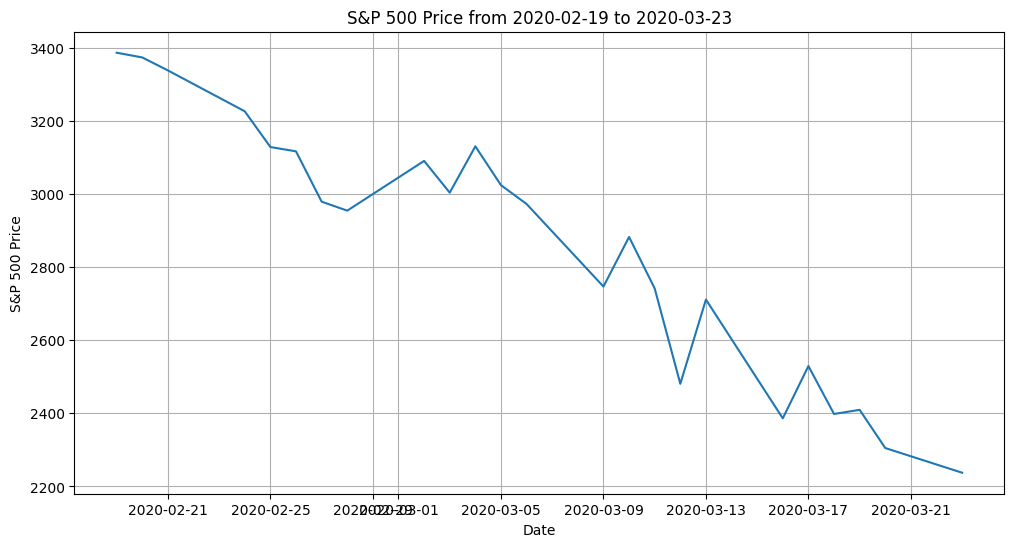

In [26]:
# Extract the S&P 500 prices
sp500_prices = filtered_df['sp500']

# Print the S&P 500 prices for the specified period
print(sp500_prices)


# If you want to plot the data
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Date'], filtered_df['sp500'])
plt.xlabel('Date')
plt.ylabel('S&P 500 Price')
plt.title('S&P 500 Price from 2020-02-19 to 2020-03-23')
plt.grid(True)
plt.show()

In [27]:
# Assuming 'stock_df' DataFrame is already loaded and 'Date' column is datetime

# Specify the start and end dates
start_date = '2020-02-19'
end_date = '2020-03-23'

# Convert 'Date' to datetime if it's not already
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

# Filter the DataFrame for the specified date range
filtered_df = stock_df[(stock_df['Date'] >= start_date) & (stock_df['Date'] <= end_date)]

# Get the S&P 500 prices for the start and end dates
start_price = filtered_df['sp500'].iloc[0]
end_price = filtered_df['sp500'].iloc[-1]

# Calculate the percentage loss
percentage_loss = ((end_price - start_price) / start_price) * 100

# Print the result
print(f"Percentage loss from {start_date} to {end_date}: {percentage_loss:.2f}%")

Percentage loss from 2020-02-19 to 2020-03-23: -33.92%


In [28]:
# we can check manually
Netloss = (2237.4-3386.15)/3386.15*100
Netloss

-33.924959024260595

### Calculate Individual stocks daily return

In [29]:
df = stock_df['sp500']
df

,sp500
0,1295.500000
1,1289.089966
2,1293.670044
3,1308.040039
4,1314.500000
...,...
2154,3327.770020
2155,3349.159912
2156,3351.280029
2157,3360.469971


In [30]:
df_daily_return = df.copy()

for j in range(1, len(df)):
  df_daily_return[j] = ((df[j]/df[j-1]) / df[j-1]) * 100

df_daily_return[0] = 0
df_daily_return


,sp500
0,0.000000
1,0.076808
2,0.077850
3,0.078158
4,0.076828
...,...
2154,0.030438
2155,0.030243
2156,0.029877
2157,0.029921


In [31]:
df = stock_df['AMZN']
df

,AMZN
0,175.929993
1,178.419998
2,181.660004
3,189.440002
4,194.449997
...,...
2154,3205.030029
2155,3225.000000
2156,3167.459961
2157,3148.159912


In [32]:
df_daily_return = df.copy()

for j in range(1, len(df)):
  df_daily_return[j] = ((df[j]/df[j-1]) / df[j-1]) * 100

df_daily_return[0] = 0
df_daily_return

,AMZN
0,0.000000
1,0.576453
2,0.570653
3,0.574054
4,0.541832
...,...
2154,0.032531
2155,0.031395
2156,0.030455
2157,0.031379


In [33]:
def daily_return(df) :
  df_daily_return = df.copy()

  # loop on columns (stocks)
  for i in df.columns[1:] :

  # loop on each row
    for j in range(1, len(df)):
      df_daily_return[i][j] = ((df[i][j] - df[i][j-1]) / df[i][j-1] ) * 100
    df_daily_return[i][0] = 0
  return df_daily_return


In [45]:
stock_daily_returns = daily_return(stock_df)

Streaming output truncated to the last 5000 lines.

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<ipython-input-33-f44dc6f696d8>:9: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment

In [46]:
stock_daily_returns;

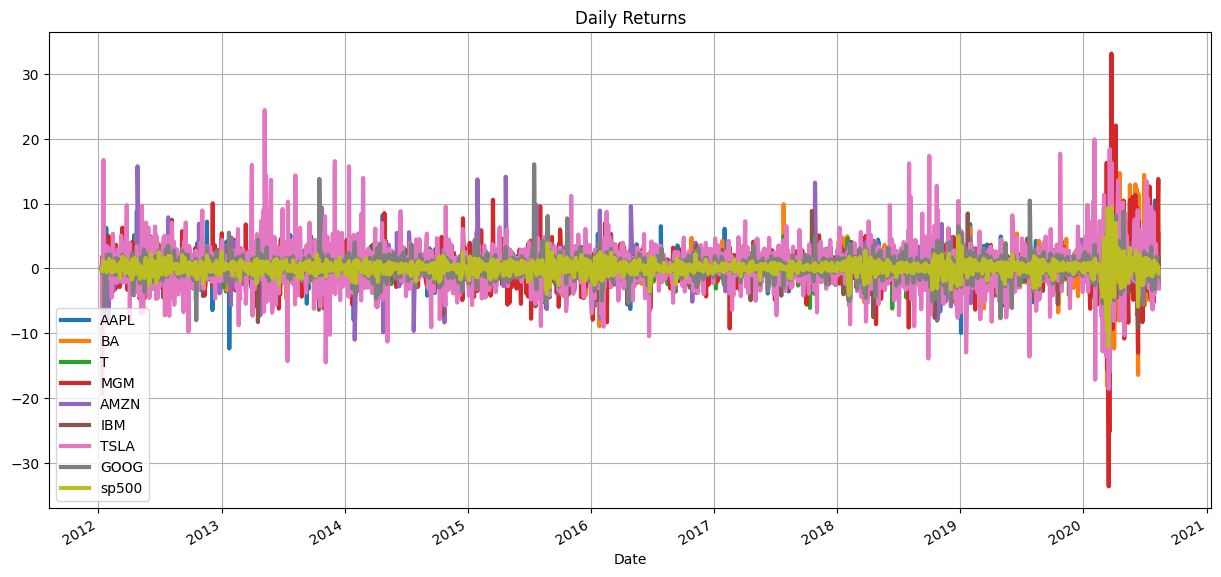

In [35]:
show_plot(stock_daily_returns, 'Daily Returns')

In [36]:
interactive_plot(stock_daily_returns, 'Interactive Daily Returns')

### Calculate the correlations between daily return

In [37]:
# Using corr method
cm = stock_daily_returns.corr()
cm

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,1.000000,0.024603,-0.012913,-0.015119,-0.008173,0.007606,-0.002416,0.003580,-0.001927,-0.001720
AAPL,0.024603,1.000000,0.385250,0.341373,0.384089,0.410234,0.434534,0.288535,0.509125,0.657321
BA,-0.012913,0.385250,1.000000,0.401602,0.554229,0.267466,0.479264,0.250946,0.388048,0.641826
T,-0.015119,0.341373,0.401602,1.000000,0.340166,0.233145,0.484219,0.152515,0.353695,0.617463
MGM,-0.008173,0.384089,0.554229,0.340166,1.000000,0.309016,0.441631,0.311879,0.439142,0.631449
AMZN,0.007606,0.410234,0.267466,0.233145,0.309016,1.000000,0.339589,0.310084,0.575284,0.539560
IBM,-0.002416,0.434534,0.479264,0.484219,0.441631,0.339589,1.000000,0.245609,0.458816,0.703935
TSLA,0.003580,0.288535,0.250946,0.152515,0.311879,0.310084,0.245609,1.000000,0.322805,0.387921
GOOG,-0.001927,0.509125,0.388048,0.353695,0.439142,0.575284,0.458816,0.322805,1.000000,0.684572
sp500,-0.001720,0.657321,0.641826,0.617463,0.631449,0.539560,0.703935,0.387921,0.684572,1.000000


In [38]:
# we have to drop Date column from dataframe
cm = stock_daily_returns.drop(columns = ['Date']).corr()
cm

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
AAPL,1.000000,0.385250,0.341373,0.384089,0.410234,0.434534,0.288535,0.509125,0.657321
BA,0.385250,1.000000,0.401602,0.554229,0.267466,0.479264,0.250946,0.388048,0.641826
T,0.341373,0.401602,1.000000,0.340166,0.233145,0.484219,0.152515,0.353695,0.617463
MGM,0.384089,0.554229,0.340166,1.000000,0.309016,0.441631,0.311879,0.439142,0.631449
AMZN,0.410234,0.267466,0.233145,0.309016,1.000000,0.339589,0.310084,0.575284,0.539560
IBM,0.434534,0.479264,0.484219,0.441631,0.339589,1.000000,0.245609,0.458816,0.703935
TSLA,0.288535,0.250946,0.152515,0.311879,0.310084,0.245609,1.000000,0.322805,0.387921
GOOG,0.509125,0.388048,0.353695,0.439142,0.575284,0.458816,0.322805,1.000000,0.684572
sp500,0.657321,0.641826,0.617463,0.631449,0.539560,0.703935,0.387921,0.684572,1.000000


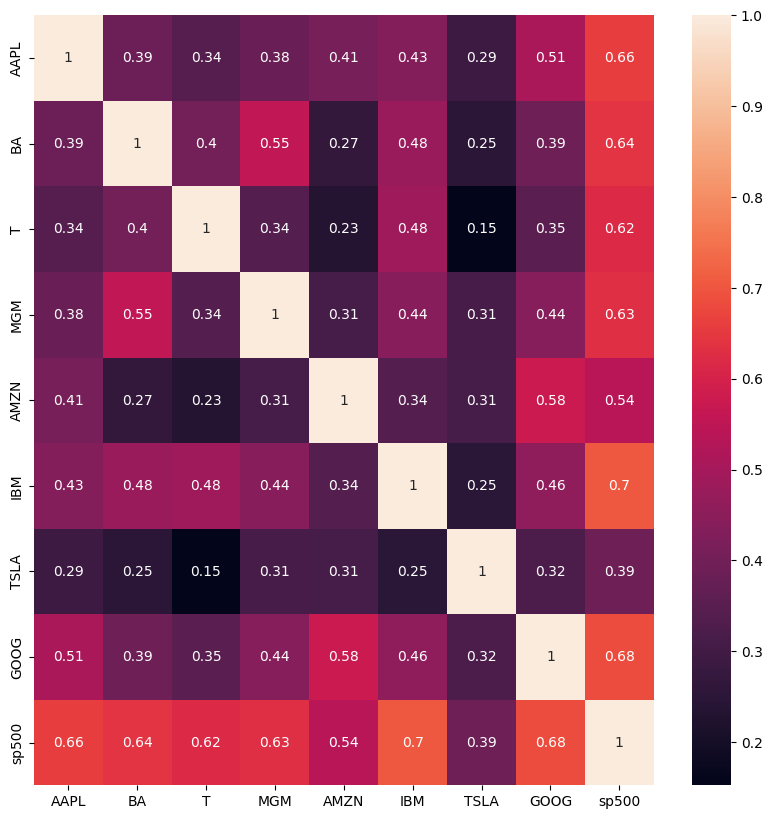

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True) # to display the numbers on the heatmap, put True into the annotation
plt.show()

The heatmap visualizes the correlation matrix of daily returns for various stocks.  Each square in the heatmap represents the correlation coefficient between the daily returns of two different stocks.

* **Values:** The color intensity of each square corresponds to the correlation coefficient, ranging from -1 (perfect negative correlation) to +1 (perfect positive correlation).  Values close to 0 indicate weak or no linear correlation.

* **Interpretation:**
    * A bright square (closer to +1) indicates a strong positive correlation. When one stock's daily return goes up, the other's tends to go up as well.
    * A dark square (closer to -1) indicates a strong negative correlation.  When one stock's daily return increases, the other's tends to decrease.
    * A square near the middle (closer to 0) indicates a weak or no linear relationship between the two stocks' daily returns.

* **Diagonal:** The diagonal line from top-left to bottom-right will always be bright, with correlation coefficients of 1. This is because each stock is perfectly correlated with itself.

* **Symmetry:** The heatmap is symmetrical across the diagonal.  The correlation between Stock A and Stock B is the same as the correlation between Stock B and Stock A.

* **Context:** In this specific example, the heatmap shows the correlations between the daily returns of stocks like AAPL (Apple), BA (Boeing), T (AT&T), MGM, IBM, TSLA (Tesla), GOOG (Google), and the S&P 500 index.  This allows an investor to see how the daily price movements of these stocks relate to each other.  Highly correlated stocks may tend to react similarly to market events, while uncorrelated stocks can offer diversification benefits in a portfolio.


In [40]:
# Calculate the correlation of each stock with the S&P 500
correlations = stock_daily_returns.drop(columns=['Date']).corr()['sp500']

# Remove the self-correlation (sp500 with sp500)
correlations = correlations.drop('sp500')

# Find the stock with the highest correlation to the S&P 500
most_correlated_stock = correlations.abs().idxmax()
correlation_value = correlations[most_correlated_stock]

print(f"The stock most correlated with the S&P500 is {most_correlated_stock} with a correlation of {correlation_value:.4f}")

The stock most correlated with the S&P500 is IBM with a correlation of 0.7039


#### Plot the Histogram for daily returns

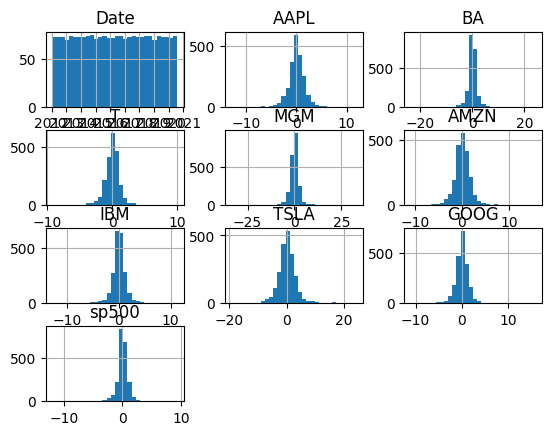

In [41]:
stock_daily_returns.hist(bins=30)
plt.show();

The histogram visualizes the distribution of daily returns for each stock in the dataset, including Apple (AAPL), Boeing (BA), AT&T (T), MGM Resorts (MGM), IBM, Tesla (TSLA), Google (GOOG), and the S&P 500 index.  Each stock has its own histogram.

* **X-axis:** Represents the daily percentage return.  Values to the right of zero indicate positive returns (price increase), while values to the left indicate negative returns (price decrease).
* **Y-axis:** Represents the frequency or number of times a particular daily return occurred.  A taller bar means that daily return value occurred more frequently.
* **Bins:** The data is divided into "bins," which are ranges of daily returns. The height of each bar corresponds to the number of daily returns that fall within that specific bin.

**Interpretation:**

Each histogram provides insights into the typical daily return for each stock and how frequently those returns occur.

* **Shape:** Look for the overall shape of the histogram. Some stocks might exhibit a normal distribution (bell-shaped curve) while others might be skewed. A right-skewed distribution (longer right tail) means that positive returns are more frequent and/or larger in magnitude, while a left-skewed distribution means negative returns are more frequent/larger.
* **Central tendency:** The peak of the histogram indicates the most common daily return.
* **Spread:** How wide the distribution is gives an idea of the volatility of the stock.  A wide histogram implies higher volatility (larger fluctuations in daily returns).
* **Outliers:** Examine the bars at the far ends of the histograms.  These represent unusually large positive or negative daily returns.


By comparing the histograms of different stocks, you can visually compare their volatility, return distributions and identify outliers.  For example, a stock with a wider distribution and more extreme values suggests a higher level of risk than a stock with a narrower distribution.  This is helpful for understanding the risk profiles of individual stocks and assessing their potential for gains or losses.


In [42]:
# Calculate the standard deviation of daily returns for each stock
std_dev = stock_daily_returns.drop(columns=['Date']).std()

# Find the stock with the lowest standard deviation
min_std_stock = std_dev.idxmin()

print(f"The stock with the lowest risk (lowest standard deviation of daily returns) is: {min_std_stock}")

The stock with the lowest risk (lowest standard deviation of daily returns) is: sp500
